- faire une impultion -> fait
- un signal en moustache -> fait
- corrélation entre les pca -> fait

regarder quel signaux contribue le plus a la pca -> fait

voir feuille

# Fonction :

> PCA

> Représentation des individus dans le plan principal

> Contribution d'un individu à une composante

> Corrélation pour deux matrices

# signaux sinusoïdale, impulsion, moustache
> Application des fonctions

In [1]:
%pylab inline
import scipy as sc
import pylab as plt
from scipy.io.matlab import mio
import numpy as np
import mdp

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


# Fonction

##  PCA

In [2]:
# fontion PCA pour x composantes
def pca(s, x_compo=4) :
    mdp.activate_extension("parallel")
    flow = mdp.nodes.PCANode(input_dim=6,output_dim=x_compo)
    flow.train(s)
    matrice_de_projection = flow.get_projmatrix()  # matrice de projection
    valeurs_propre = flow.d     # valeurs propre
    #total_variance = flow.explained_variance
    y = flow.execute(s)
    scheduler = mdp.parallel.ProcessScheduler(n_processes=2, verbose=True)
    pflow = mdp.parallel.ParallelFlow([flow],verbose=1)
    pflow.train(s,scheduler)
    y = pflow.execute(s)
    scheduler.shutdown()
    return y, valeurs_propre, matrice_de_projection #, total_variance

## Représentation des individus dans le plan principal

In [3]:
# Représentation des individus dans le plan principal
def representation (matrice_de_projection, nb_signaux, compo1, compo2) :
    plot = plt.scatter (matrice_de_projection[:,compo1], matrice_de_projection[:,compo2], color='k')
    i = 0
    while i < nb_signaux :
        plt.annotate( "%s" %(i+1), xy=(matrice_de_projection[i,compo1],matrice_de_projection[i,compo2]), xytext=(10, -5), ha='left', textcoords='offset points')
        i = i+1
    plt.xlabel(u'Composante %s' %(compo1+1))
    plt.ylabel(u'Composante %s' %(compo2+1))
    plt.title(u'Représentation des individus dans le plan %s, %s' %((compo1+1),(compo2+1)), weight='bold')

## Contribution d'un individu à une composante

**Contribution d'un individu dans une composante**

$CTR(k,i) =\frac{p_i C_ik^2 (i)}{\lambda_k} $

> $i$ individu = ligne de la matrice = signaux

> $p_i$ poids de l'individue

> $C_ik$ facteur de l'individue = coordonée de l'individu $i$ pour la composante $k$

> $\lambda_k$ valeur propre de la composante $k$

> $CTR(k,i)$ contribution de l'individu $i$ à la composante $k$

*(Statistique Descriptive Multidimensionnelle (pour les nuls) (10/33) et Introduction à l’analyse des données (28/80))*

In [4]:
# fontion contribution de chaques signaux à chaques composantes
def contribution (matrice_projection, valeurs_propres, nb_signaux, x_compo) :
    k = 0
    contribution = []
    while k < x_compo :
        i = 0
        cont = []
        while i < nb_signaux :
            con = (((matrice_projection[i,k]**2)/nb_signaux)/(valeurs_propres[k]))
            cont.append(con)
            i = i+1
        contribution.append(cont)
        maximum = np.max(contribution[k])
        print (u'Pour la composante %s,' % (k+1), u'le signal ayant la plus forte contribution est : signal', contribution[k].index(maximum)+1, u'=', maximum)
        k = k+1
   
    
    kplot = 0
    plt.figure(figsize=(18,5))
    while kplot < x_compo :
        index = np.arange(nb_signaux)
        plt.subplot(1, x_compo, (kplot+1))
        plt.bar(index, contribution[kplot], color='k')
        plt.xlabel(u'Signaux')
        plt.title(u'Contribution à la composante %s' %(kplot+1))
        plt.xticks(index + 0.5, ('1', '2', '3', '4', '5', '6'))

        kplot = kplot+1

    return contribution

*à vérifier*

**Qualité de la représentation d'un individu** = le cosinus carré de l’angle formé par un point avec sa projection sur le plan

http://campus-douai.gemtech.fr/pluginfile.php/13713/mod_resource/content/0/SP-ADD2.pdf diapo 24


$cos^2 \theta = \frac{C_{ik} ^2 (i)}{||e_i|| ^2}$

> $C_{ik}$ facteur de l'individue

> $||e_i|| ^2 = \sum_{k=1}^p { c_{ik} ^2 }$ 

Lorsque l’angle est proche de 0, c'est-à-dire que l’individu est bien représenté, le cosinus est proche de 1.

Dans le cas inverse, l’angle est proche de 90° et le cosinus est proche de 0. 

In [5]:
# fonction qualité de représentation d'un individu
def qualite_representation(matrice_projection, nb_signaux, x_compo) :
    i = 0
    qualite = []
    while i < nb_signaux :
        mk = 0
        moy = []
        mo = []
        while mk < x_compo :
            mo.append(matrice_projection[i,mk]**2)
            mk = mk+1
        moy = sum(mo)
        #print moy

        k = 0
        qualit = []
        while k < x_compo :
            qual = matrice_projection[i,k]**2 / moy
            print (u'La qualité de la représentation du signal %s' %(i+1), u'sur l\'axe %s' %(k+1), '=', qual)
            qualit.append(qual)
            #print 'qualit =', qualit
            k = k+1
        qualite.append(qualit)
        q = np.mat(qualite) # transforme en matrice
        #print 'qualite =', q
        i = i+1
    
    kplot = 0
    plt.figure(figsize=(18,5))
    while kplot < x_compo :
        index = np.arange(nb_signaux)
        plt.subplot(1, x_compo, (kplot+1))
        plt.bar(index, q[:,kplot], color='k')
        plt.xlabel(u'Signaux')
        plt.title(u'Qualité de la représentation des signaux sur l\'axe %s' %(kplot+1))
        plt.xticks(index + 0.5, ('1', '2', '3', '4', '5', '6'))

        kplot = kplot+1
    #return qualite

## Corrélation pour deux matrices

In [6]:
# fonction corrélation pour deux matrices de taille x_compo
def correlation (matrice1, matrice2, x_compo):
    i = 0
    correlation = []
    while i < x_compo :
        j = 0
        corr = []
        while j < x_compo :
            coef = np.corrcoef (matrice1[i], matrice2[j])
            corr.append(coef[0,1])
            j = j+1
        correlation.append(corr)
        i = i+1
    return correlation          

# Signaux sinusoïdale

In [7]:
def signaux_sinusoides (f0=20, f1=50, f2=150, a0=10, a1=20, a2=1) :
    fs = 500.0
    dt = 1.0/fs
    duree = 1# s
    N = int(duree/dt)
    #print "N =", N
    t = sc.linspace(0.0,duree,N)
    y0 = sc.zeros(N,dtype='float')
    y1 = sc.zeros(N,dtype='float')
    y2 = sc.zeros(N,dtype='float')
    z0 = sc.zeros(N,dtype='float')
    z1 = sc.zeros(N,dtype='float')
    z2 = sc.zeros(N,dtype='float')
    
    #----------------------------------------------------
    #          Création de la base sinusoïdale
    #----------------------------------------------------
    #print "y0 =", y0.shape
    y0 = a0*sc.sin(2.0*sc.pi*f0*t)
    y1 = a1*sc.sin(2.0*sc.pi*f1*t)
    y2 = a2*sc.sin(2.0*sc.pi*f2*t)

    plt.figure(1, figsize=(18, 11))
    plt.subplot(321)
    plt.title(u'Fonctions sinusoidales qui sont utilisés pour construire les signaux', size=12, weight='bold')
    plt.xlabel(u'Temps [ms]')
    plt.ylabel(u'Vecteurs propres initiaux')
    plt.plot(y0)
    plt.plot(y1)
    plt.plot(y2)

    #----------------------------------------------------
    #          Création des signaux
    #----------------------------------------------------
    M = np.array([[10.,2.,0.1],[1.0,0.8,1.0],[-0.3,0.7,-0.9],[1.0,0.8,-2.0],[1.0,0.8,1.0],[1.0,-0.8,-1.0]])
    #print "M =", M
    x = np.array([y0,y1,y2])
    s = sc.dot(M,x)
    s = s.transpose()
    #print "s =",s.shape
    #print "s0 =",s[:,0]
    
    plt.subplot(322)
    plt.title(u'Signaux', weight='bold')
    plt.xlabel(u'Temps [ms]')
    plt.ylabel(u'Intensité de tous les signaux')
    plt.plot(s)
    return s

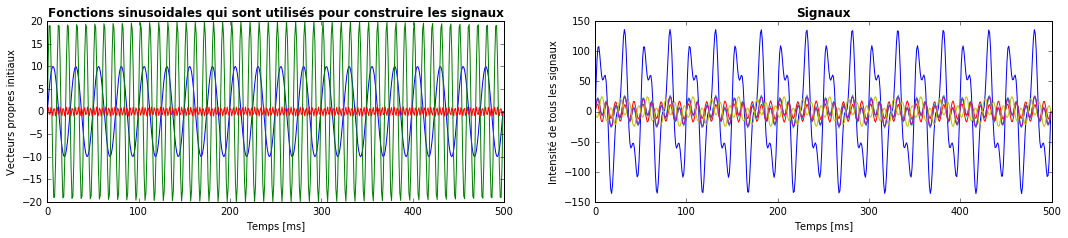

In [8]:
s_sinusoides = signaux_sinusoides ()

scheduler initialized with 2 processes
scheduler shutdown
valeurs propres [  6.16642568e+03   4.48093459e+02   3.89086059e+00]
matrice de projection [[ 0.96897442  0.15142233  0.02896144]
 [ 0.14121989 -0.35064368  0.33208079]
 [ 0.0270639  -0.46741521 -0.35497157]
 [ 0.14120785 -0.3500073  -0.74333057]
 [ 0.14121989 -0.35064368  0.33208079]
 [ 0.02302926  0.62464967 -0.31632384]]


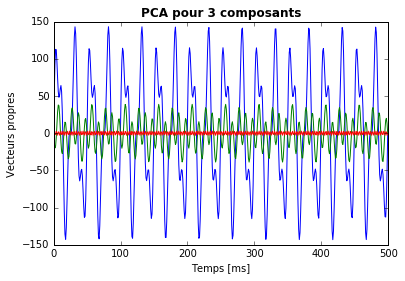

In [9]:
composantes = 3
p_sinusoides, v_sinusoides, m_sinusoides = pca(s_sinusoides, x_compo=composantes)
print (u'valeurs propres', v_sinusoides)
print (u'matrice de projection', m_sinusoides)
#print p_sinusoides.shape
plt.figure()
plt.title(u'PCA pour %s composants' % composantes, weight='bold')
plt.xlabel(u'Temps [ms]')
plt.ylabel(u'Vecteurs propres')
plt.plot(p_sinusoides)
plt.show()

In [10]:
# vérification que les valeurs propres sont bien la variance des composantes
def moyenne(tableau):
    return sum(tableau, 0) / len(tableau)

def variance(tableau):
    m=moyenne(tableau)
    return moyenne([(x-m)**2 for x in tableau])
 
print(variance(p_sinusoides[:,0]))    # variance de la première composante
print (v_sinusoides[0])                 # valeur propre de la première composante

# les deux sont similaires

6154.09282942
6166.42568078


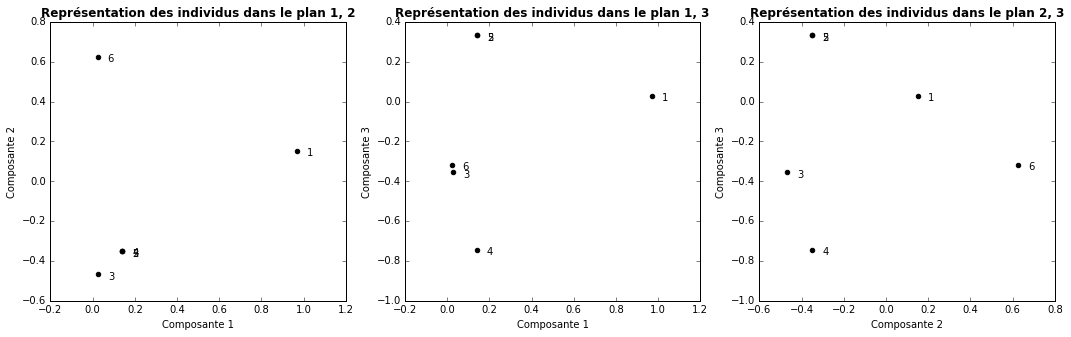

In [11]:
#Représentation des individus dans le plan principal
plt.figure(figsize=(18,5))
plt.subplot(131)
representation(m_sinusoides, 6, 0, 1)
plt.subplot(132)
representation(m_sinusoides, 6, 0, 2)
plt.subplot(133)
representation(m_sinusoides, 6, 1, 2)
plt.show()

Pour la composante 1, le signal ayant la plus forte contribution est : signal 1 = 2.53769761732e-05
Pour la composante 2, le signal ayant la plus forte contribution est : signal 6 = 0.00014512865451
Pour la composante 3, le signal ayant la plus forte contribution est : signal 4 = 0.0236683002403
[[2.5376976173165558e-05, 5.3902265153058922e-07, 1.9796848705473869e-08, 5.3893067214092164e-07, 5.3902265153058901e-07, 1.4334254788241902e-08], [8.5282516227813186e-06, 4.5731156567103127e-05, 8.1261685548133744e-05, 4.556531189249952e-05, 4.5731156567103113e-05, 0.00014512865450971846], [3.5928865855919975e-05, 0.0047237900891489203, 0.0053974698602086433, 0.023668300240297868, 0.0047237900891488509, 0.0042861457638849482]]


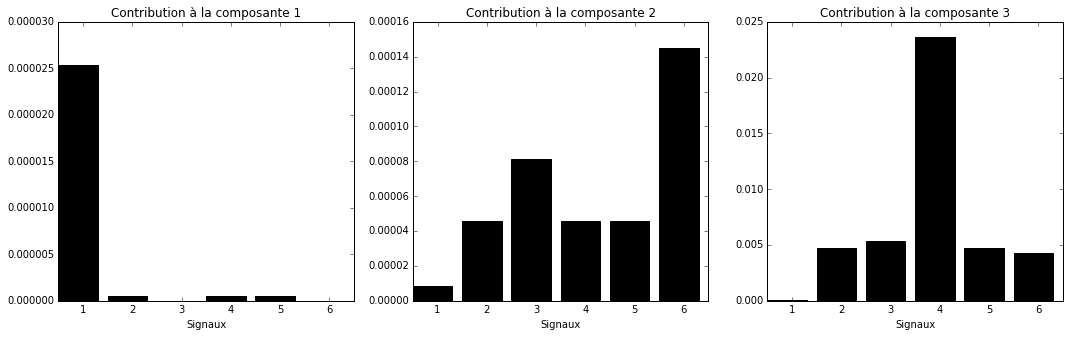

In [12]:
contri = contribution (m_sinusoides, v_sinusoides, 6, 3)
print (contri)

La qualité de la représentation du signal 1 sur l'axe 1 = 0.975311095408
La qualité de la représentation du signal 1 sur l'axe 2 = 0.0238176221349
La qualité de la représentation du signal 1 sur l'axe 3 = 0.000871282457529
La qualité de la représentation du signal 2 sur l'axe 1 = 0.0787728582738
La qualité de la représentation du signal 2 sur l'axe 2 = 0.485642711791
La qualité de la représentation du signal 2 sur l'axe 3 = 0.435584429935
La qualité de la représentation du signal 3 sur l'axe 1 = 0.00212173969646
La qualité de la représentation du signal 3 sur l'axe 2 = 0.632873580758
La qualité de la représentation du signal 3 sur l'axe 3 = 0.365004679545
La qualité de la représentation du signal 4 sur l'axe 1 = 0.0286907668736
La qualité de la représentation du signal 4 sur l'axe 2 = 0.176270121989
La qualité de la représentation du signal 4 sur l'axe 3 = 0.795039111137
La qualité de la représentation du signal 5 sur l'axe 1 = 0.0787728582738
La qualité de la représentation du signal 

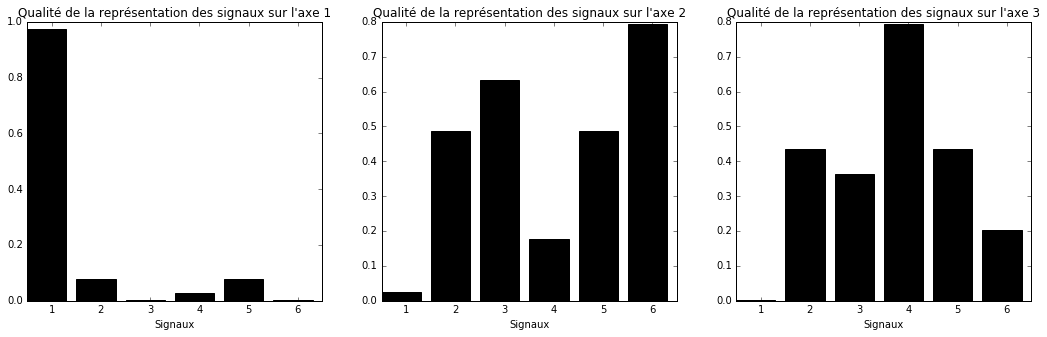

In [13]:
qualite_representation(m_sinusoides, 6, 3)

[[1.0, -0.99372827293156685, -0.99955328587017811], [-0.99372827293156696, 1.0, 0.99662637162441159], [-0.99955328587017822, 0.9966263716244117, 1.0]]


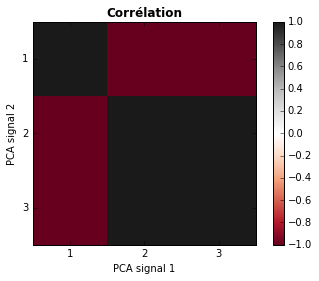

In [14]:
c_sinusoides = correlation(p_sinusoides, p_sinusoides, composantes)
print (c_sinusoides)
plt.figure()
plt.title(u'Corrélation', weight='bold')
plt.imshow (c_sinusoides, cmap=cm.RdGy, interpolation='nearest', vmin=(-1), vmax=(1)) # interpolation='nearest' pour évité le floutage
plt.xlabel(u'PCA signal 1')
plt.xticks(arange(composantes), ('1', '2', '3', '4'))
plt.ylabel(u'PCA signal 2')
plt.yticks(arange(composantes), ('1', '2', '3', '4'))
plt.colorbar()
plt.show()

# Signal impultion

In [15]:
def signaux_impulsions (f0=40, f1=100, f2=300, a0=10, a1=20, a2=10) :
    fs = 500.0
    dt = 1.0/fs
    duree = 1# s
    N = int(duree/dt)
    #print "N =", N
    t = sc.linspace(0.0,duree,N)
    y0 = sc.zeros(N,dtype='float')
    y1 = sc.zeros(N,dtype='float')
    y2 = sc.zeros(N,dtype='float')
    z0 = sc.zeros(N,dtype='float')
    z1 = sc.zeros(N,dtype='float')
    z2 = sc.zeros(N,dtype='float')
    
    #----------------------------------------------------
    #          Création de la base sinusoïdale
    #----------------------------------------------------
    #print "y0 =", y0.shape
    y0 = a0*sc.sin(2.0*sc.pi*f0*t)/(2.0*sc.pi*f0*t+1)
    y1[0:149] = 0
    y1[150:199] = 0 #a1*sc.sin(2.0*sc.pi*f1*t[150:199])/(2.0*sc.pi*f1*t[150:199])
    y1[200:N] = 0
    y2[0:199] = 0
    y2[200:349] = 0 #a2*sc.sin(2.0*sc.pi*f2*t[200:349])/(2.0*sc.pi*f2*t[200:349])
    y2[350:N] = 0
    
    plt.figure(1, figsize=(18, 11))
    plt.subplot(321)
    plt.title(u'Fonctions sinusoidales qui sont utilisés pour construire les signaux', size=12, weight='bold')
    plt.xlabel(u'Temps [ms]')
    plt.ylabel(u'Vecteurs propres initiaux')
    plt.plot(y0)
    plt.plot(y1)
    plt.plot(y2)

    #----------------------------------------------------
    #          Création des signaux
    #----------------------------------------------------
    M = np.array([[0.4,-0.8,0.7],[1.0,0.8,2.0],[-0.3,0.7,-0.9],[4.0,0.8,-2.0],[12.0,0.8,1.0],[10.0,-0.8,-2.0]])
    #print "M =", M
    x = np.array([y0,y1,y2])
    s = sc.dot(M,x)
    s = s.transpose()
    #print "s =",s.shape
    #print "s0 =",s[:,0]
    
    plt.subplot(322)
    plt.title(u'Signaux', weight='bold')
    plt.xlabel(u'Temps [ms]')
    plt.ylabel(u'Intensité de tous les signaux')
    plt.plot(s)
    return s

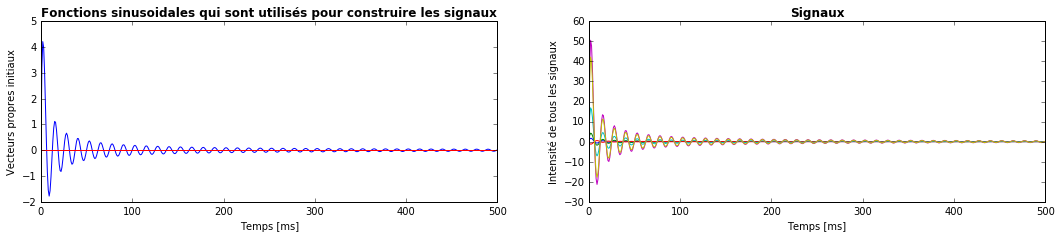

In [16]:
s_impulsions = signaux_impulsions ()

scheduler initialized with 2 processes
scheduler shutdown
valeurs propre [  4.10297994e+01   6.45989012e-15   1.79476114e-15]
matrice de projection [[-0.02474753  0.01831817  0.04801444]
 [-0.06186882 -0.65258874  0.74945659]
 [ 0.01856065  0.09271194  0.06202976]
 [-0.24747529 -0.71627588 -0.6405743 ]
 [-0.74242587  0.19255819  0.03057052]
 [-0.61868822  0.12274803  0.14453975]]


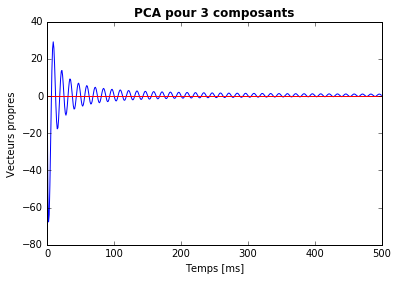

In [17]:
composantes = 3
p_impulsions, v_impulsions, m_impulsions = pca(s_impulsions, x_compo=composantes)
print (u'valeurs propre', v_impulsions)
print (u'matrice de projection',m_impulsions)
#print p_impulsions.shape
plt.figure()
plt.title(u'PCA pour %s composants' % composantes, weight='bold')
plt.xlabel(u'Temps [ms]')
plt.ylabel(u'Vecteurs propres')
plt.plot(p_impulsions)
plt.show()

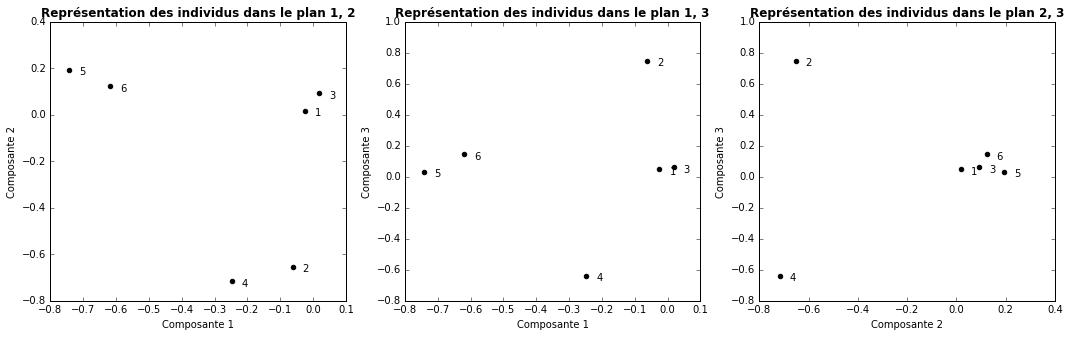

In [18]:
#Représentation des individus dans le plan principal
plt.figure(figsize=(18,5))
plt.subplot(131)
representation(m_impulsions, 6, 0, 1)
plt.subplot(132)
representation(m_impulsions, 6, 0, 2)
plt.subplot(133)
representation(m_impulsions, 6, 1, 2)
plt.show()

Pour la composante 1, le signal ayant la plus forte contribution est : signal 5 = 0.00223900750209
Pour la composante 2, le signal ayant la plus forte contribution est : signal 4 = 1.32368386229e+13
Pour la composante 3, le signal ayant la plus forte contribution est : signal 2 = 5.21596972447e+13
[[2.4877861134343873e-06, 1.5548663208964872e-05, 1.3993796888068411e-06, 0.00024877861134343828, 0.0022390075020909468, 0.0015548663208964913], [8657405102.3474541, 10987598299610.609, 221766013340.91455, 13236838622887.289, 956637964482.42419, 388734133545.60553], [214084796643.80319, 52159697244743.672, 357307679120.30426, 38104925796273.625, 86785641863.05838, 1940066782653.929]]


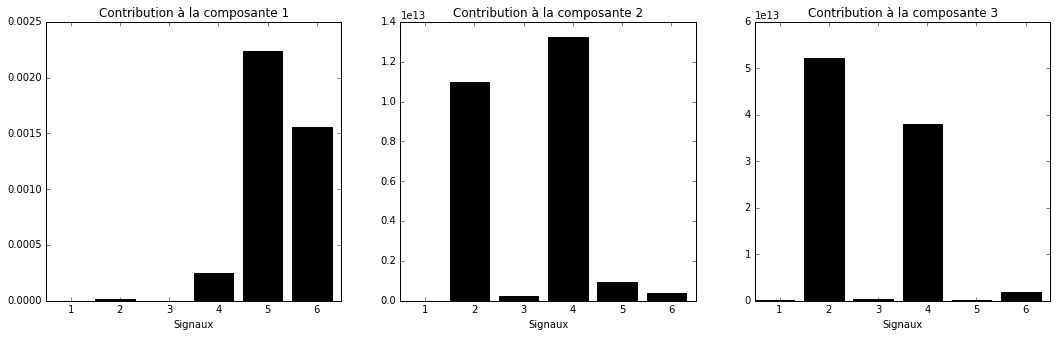

In [19]:
contri = contribution (m_impulsions, v_impulsions, 6, 3)
print (contri)

La qualité de la représentation du signal 1 sur l'axe 1 = 0.188247245913
La qualité de la représentation du signal 1 sur l'axe 2 = 0.103140461121
La qualité de la représentation du signal 1 sur l'axe 3 = 0.708612292966
La qualité de la représentation du signal 2 sur l'axe 1 = 0.00386101381704
La qualité de la représentation du signal 2 sur l'axe 2 = 0.4295728348
La qualité de la représentation du signal 2 sur l'axe 3 = 0.566566151383
La qualité de la représentation du signal 3 sur l'axe 1 = 0.0269397762893
La qualité de la représentation du signal 3 sur l'axe 2 = 0.67217003096
La qualité de la représentation du signal 3 sur l'axe 3 = 0.300890192751
La qualité de la représentation du signal 4 sur l'axe 1 = 0.0621999958976
La qualité de la représentation du signal 4 sur l'axe 2 = 0.521059511612
La qualité de la représentation du signal 4 sur l'axe 3 = 0.416740492491
La qualité de la représentation du signal 5 sur l'axe 1 = 0.935484371592
La qualité de la représentation du signal 5 sur l'

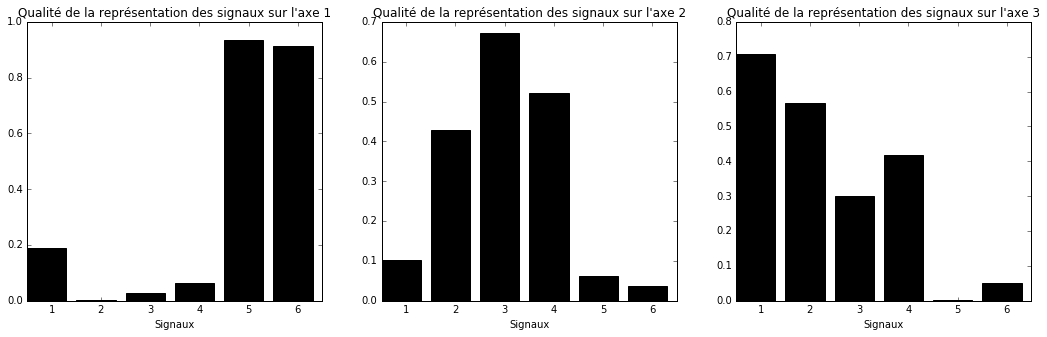

In [20]:
qualite_representation(m_impulsions, 6, 3)

[[1.0, -1.0, -1.0], [-1.0, 1.0, 1.0], [-1.0, 1.0, 1.0]]


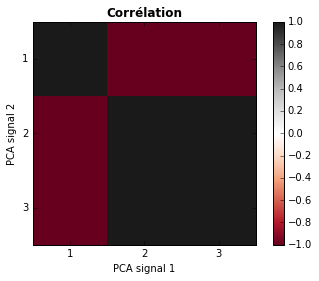

In [21]:
c_impulsions = correlation(p_impulsions, p_impulsions, composantes)
print (c_impulsions)
plt.figure()
plt.title(u'Corrélation', weight='bold')
plt.imshow (c_impulsions, cmap=cm.RdGy, interpolation='nearest', vmin=(-1), vmax=(1)) # interpolation='nearest' pour évité le floutage
plt.xlabel(u'PCA signal 1')
plt.xticks(arange(composantes), ('1', '2', '3', '4'))
plt.ylabel(u'PCA signal 2')
plt.yticks(arange(composantes), ('1', '2', '3', '4'))
plt.colorbar()
plt.show()

# Signal moustache

In [22]:
def signaux_moustaches (f0=80, f1=50, f2=150, a0=10, a1=2000, a2=10) :
    fs = 500.0
    dt = 1.0/fs
    duree = 1# s
    N = int(duree/dt)
    #print "N =", N
    t = sc.linspace(0.0,duree,N)
    y0 = sc.zeros(N,dtype='float')
    y1 = sc.zeros(N,dtype='float')
    y2 = sc.zeros(N,dtype='float')
    z0 = sc.zeros(N,dtype='float')
    z1 = sc.zeros(N,dtype='float')
    z2 = sc.zeros(N,dtype='float')
    
    #----------------------------------------------------
    #          Création de la base sinusoïdale
    #----------------------------------------------------
    #print "y0 =", y0.shape
    y0[0:100] = 0
    y0[100:200]=a0*sc.sin(2.0*sc.pi*f0*t[100:200])
    y0[200:N] = 0
    y1[0:50] = 0
    y1[50:75] = a1*sc.cos(2.0*sc.pi*f1*t[50:75])/(2.0*sc.pi*f1*t[50:75])
    y1[75:N] = 0
    y2[0:400] = 0
    y2[400:450] = a2*sc.sin(2.0*sc.pi*f2*t[400:450])
    y2[450:N] = 0

    plt.figure(1, figsize=(18, 11))
    plt.subplot(321)
    plt.title(u'Fonctions sinusoidales qui sont utilisés pour construire les signaux', size=12, weight='bold')
    plt.xlabel(u'Temps [ms]')
    plt.ylabel(u'Vecteurs propres initiaux')
    plt.plot(y0)
    plt.plot(y1)
    plt.plot(y2)

    #----------------------------------------------------
    #          Création des signaux
    #----------------------------------------------------
    M = np.array([[0.4,-0.8,0.7],[1.0,0.8,2.0],[-0.3,0.7,-0.9],[4.0,0.8,-2.0],[12.0,0.8,1.0],[10.0,-0.8,-2.0]])
    #print "M =", M
    x = np.array([y0,y1,y2])
    s = sc.dot(M,x)
    s = s.transpose()
    #print "s =",s.shape
    #print "s0 =",s[:,0]
    
    plt.subplot(322)
    plt.title(u'Signaux', weight='bold')
    plt.xlabel(u'Temps [ms]')
    plt.ylabel(u'Intensité de tous les signaux')
    plt.plot(s)
    return s

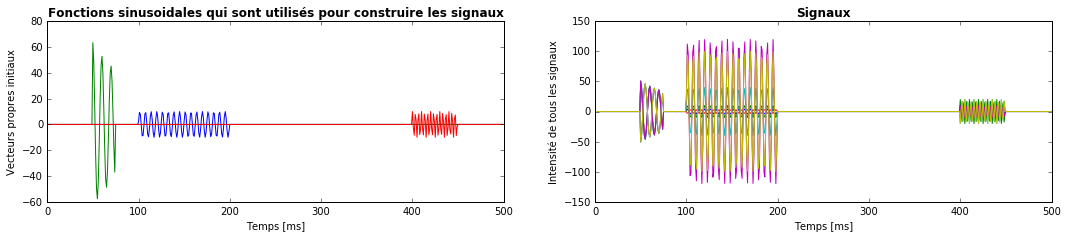

In [23]:
s_moustaches = signaux_moustaches()

scheduler initialized with 2 processes
scheduler shutdown
valeurs propre [ 2623.0526027    253.54564747    63.92975275]
matrice de projection [[-0.01621065  0.40337524  0.32297348]
 [-0.0656996  -0.44589271  0.4482739 ]
 [ 0.01064328 -0.34644881 -0.36121462]
 [-0.25691401 -0.33250823 -0.60483184]
 [-0.74490314 -0.31574371  0.3657596 ]
 [-0.61190032  0.55514458 -0.25428526]]


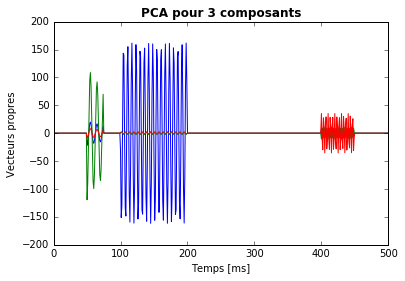

In [24]:
p_moustaches, v_moustaches, m_moustaches = pca(s_moustaches, x_compo=composantes)
print (u'valeurs propre', v_moustaches)
print (u'matrice de projection',m_moustaches)
#print p_moustaches.shape
plt.figure()
plt.title(u'PCA pour %s composants' % composantes, weight='bold')
plt.xlabel(u'Temps [ms]')
plt.ylabel(u'Vecteurs propres')
plt.plot(p_moustaches)
plt.show()

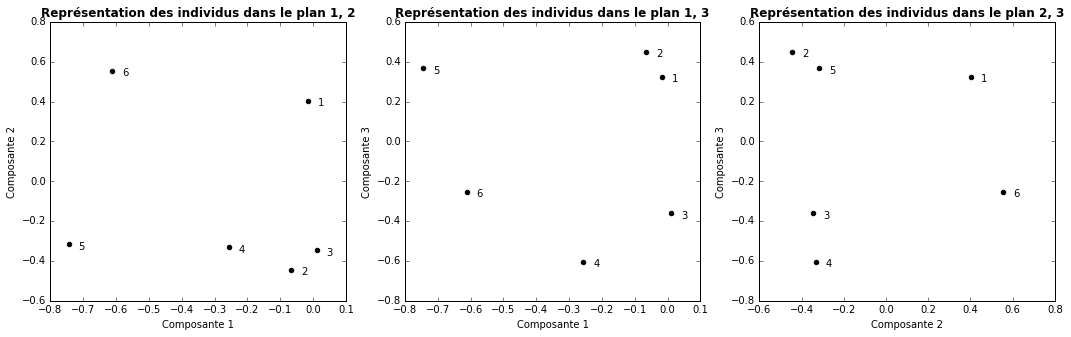

In [25]:
#Représentation des individus dans le plan principal
plt.figure(figsize=(18,5))
plt.subplot(131)
representation(m_moustaches, 6, 0, 1)
plt.subplot(132)
representation(m_moustaches, 6, 0, 2)
plt.subplot(133)
representation(m_moustaches, 6, 1, 2)
plt.show()

Pour la composante 1, le signal ayant la plus forte contribution est : signal 5 = 3.5256675148e-05
Pour la composante 2, le signal ayant la plus forte contribution est : signal 6 = 0.000202583841878
Pour la composante 3, le signal ayant la plus forte contribution est : signal 4 = 0.000953707097102
[[1.6697156104358897e-08, 2.7426299965217285e-07, 7.1976834571572466e-09, 4.1938928752100721e-06, 3.525667514804295e-05, 2.3790475179470473e-05], [0.00010695745821277317, 0.00013069330417718857, 7.8898863933491752e-05, 7.2677065089591752e-05, 6.553329543046099e-05, 0.0002025838418779256], [0.00027194398223960315, 0.00052388098246916777, 0.00034015461705773782, 0.00095370709710168751, 0.00034876845860652407, 0.00016857303782788952]]


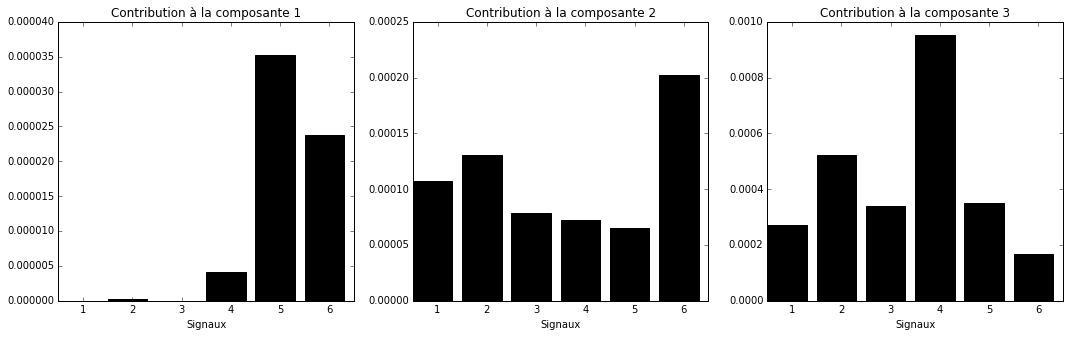

In [26]:
contri = contribution (m_moustaches, v_moustaches, 6, 3)
print (contri)

La qualité de la représentation du signal 1 sur l'axe 1 = 0.000983159890082
La qualité de la représentation du signal 1 sur l'axe 2 = 0.608754070278
La qualité de la représentation du signal 1 sur l'axe 3 = 0.390262769832
La qualité de la représentation du signal 2 sur l'axe 1 = 0.0106819714239
La qualité de la représentation du signal 2 sur l'axe 2 = 0.492024453499
La qualité de la représentation du signal 2 sur l'axe 3 = 0.497293575077
La qualité de la représentation du signal 3 sur l'axe 1 = 0.000452003802631
La qualité de la représentation du signal 3 sur l'axe 2 = 0.478926926323
La qualité de la représentation du signal 3 sur l'axe 3 = 0.520621069874
La qualité de la représentation du signal 4 sur l'axe 1 = 0.121692956818
La qualité de la représentation du signal 4 sur l'axe 2 = 0.203842459547
La qualité de la représentation du signal 4 sur l'axe 3 = 0.674464583635
La qualité de la représentation du signal 5 sur l'axe 1 = 0.703846337799
La qualité de la représentation du signal 5 

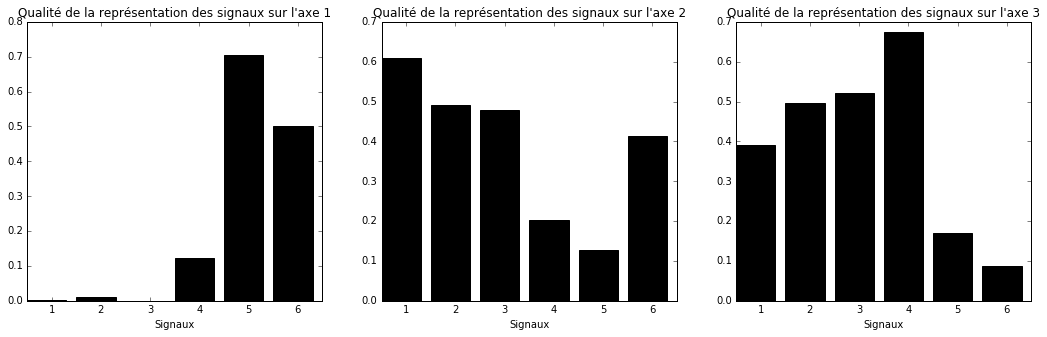

In [27]:
qualite_representation(m_moustaches, 6, 3)

[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0]]


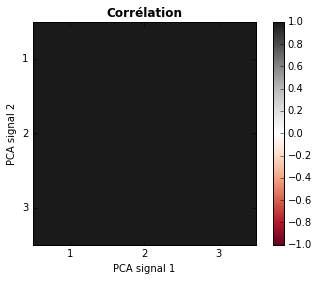

In [28]:
c_moustaches = correlation(p_moustaches, p_moustaches, composantes)
print (c_moustaches)
plt.figure()
plt.title(u'Corrélation', weight='bold')
plt.imshow (c_moustaches, cmap=cm.RdGy, interpolation='nearest', vmin=(-1), vmax=(1)) # interpolation='nearest' pour évité le floutage
plt.xlabel(u'PCA signal 1')
plt.xticks(arange(composantes), ('1', '2', '3', '4'))
plt.ylabel(u'PCA signal 2')
plt.yticks(arange(composantes), ('1', '2', '3', '4'))
plt.colorbar()
plt.show()

# Corrélation

[[-0.99249656181233026, 0.99249656181233026, 0.99249656181233015], [0.97259915587620227, -0.97259915587620249, -0.97259915587620238], [0.98839884839034098, -0.98839884839034109, -0.9883988483903412]]


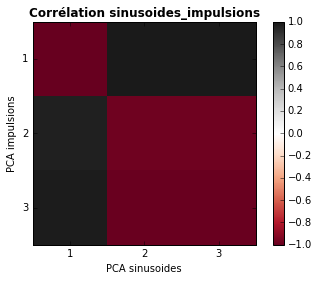

In [29]:
c_sin_imp = correlation(p_sinusoides, p_impulsions, composantes)
print (c_sin_imp)
plt.figure()
plt.title(u'Corrélation sinusoides_impulsions', weight='bold')
plt.imshow (c_sin_imp, cmap=cm.RdGy, interpolation='nearest', vmin=(-1), vmax=(1)) # interpolation='nearest' pour évité le floutage
plt.xlabel(u'PCA sinusoides')
plt.xticks(arange(composantes), ('1', '2', '3', '4'))
plt.ylabel(u'PCA impulsions')
plt.yticks(arange(composantes), ('1', '2', '3', '4'))
plt.colorbar()
plt.show()

[[0.56390021733228823, 0.56390021733228823, 0.56390021733228823], [-0.65271084908046029, -0.65271084908046029, -0.65271084908046029], [-0.58833022665076717, -0.58833022665076717, -0.58833022665076717]]


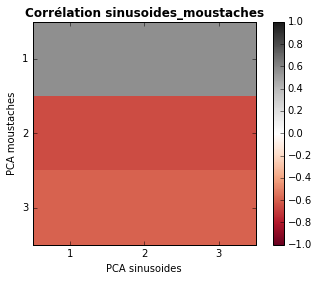

In [30]:
c_sin_mous = correlation(p_sinusoides, p_moustaches, composantes)
print (c_sin_mous)
plt.figure()
plt.title(u'Corrélation sinusoides_moustaches', weight='bold')
plt.imshow (c_sin_mous, cmap=cm.RdGy, interpolation='nearest', vmin=(-1), vmax=(1)) # interpolation='nearest' pour évité le floutage
plt.xlabel(u'PCA sinusoides')
plt.xticks(arange(composantes), ('1', '2', '3', '4'))
plt.ylabel(u'PCA moustaches')
plt.yticks(arange(composantes), ('1', '2', '3', '4'))
plt.colorbar()
#cb.set_clim(-1, 1) 
plt.show()

[[-0.45869111168387444, -0.45869111168387444, -0.45869111168387444], [0.45869111168387461, 0.45869111168387461, 0.45869111168387461], [0.4586911116838745, 0.4586911116838745, 0.4586911116838745]]


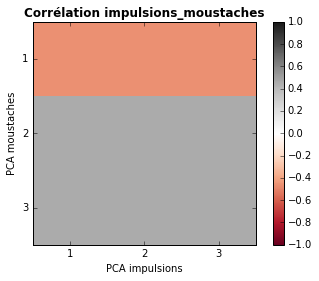

In [31]:
c_imp_mous = correlation(p_impulsions, p_moustaches, composantes)
print (c_imp_mous)
plt.figure()
plt.title(u'Corrélation impulsions_moustaches', weight='bold')
plt.imshow (c_imp_mous, cmap=cm.RdGy, interpolation='nearest', vmin=(-1), vmax=(1)) # interpolation='nearest' pour évité le floutage
plt.xlabel(u'PCA impulsions')
plt.xticks(arange(composantes), ('1', '2', '3', '4'))
plt.ylabel(u'PCA moustaches')
plt.yticks(arange(composantes), ('1', '2', '3', '4'))
plt.colorbar()
plt.show()